### Descripcion

Permitre cargar una partida,
avanzar en los movimientos
Cada movimmiento tiene un indice, con el cual es posible anadir elementos visuales: flechas, etc.

Las funciones y parametros permiten reutiliar el notebook y generar de nuevo los reportes.

#### Problema:
Duplicar este Notebook y despues modificar cambias en cada copia? o 
parametrizar el notebook y permitir cargar y gernerar el reporte cada vez.
- Textos, notas
- elementos visuales


### Docs

- https://python-chess.readthedocs.io/en/latest/
- https://python-chess.readthedocs.io/en/latest/pgn.html

- https://reposhub.com/python/game-development/niklasf-python-chess.html

In [1]:
from IPython.display import display, clear_output
import ipywidgets as widgets
#import chess
#import chess.pgn
#import copy

In [41]:
%run ../shared/util_chess.ipynb
%run ../shared/util_engine.ipynb
%run ../shared/util_board.ipynb

In [3]:
_notebookFolder = 'nb-005'

In [29]:
archiv = [
    {
        'relevantMovesIndexs' : [16,20,22,23,26,27,33,34,35,36,38,40,42,],
        'version' : 'lost-6538378905',
        'file': 'lost/6538378905-Enjuten_vs_MrCreeed-2021-02-12.pgn'
    },
        {
        'relevantMovesIndexs' : [1,3,5,6,9,13,14,15,18,21,22,25,29,31,32,38,39,43,46,55,59,63,65,93],
        'version' : 'lost-6546787425',
        'file': 'lost/6546787425-OtioMilho_vs_Enjuten-2021-02-13.pgn'
    }
]

In [30]:
ARCHIV_ITEM_INDEX = 1 # @Param

In [31]:
registry = archiv[ ARCHIV_ITEM_INDEX ]
_version = registry['version']
pgnfilename = f"../../data/master/games-archiv-chess.com/{registry['file']}"

In [42]:
utilsEngine = UtilsEngine()
utilsChess = UtilsChess()
utilsBoard = UtilsBoard( f'Game: {_version}')

# Game

In [8]:
## load PGN

pgn = open(pgnfilename)
game = chess.pgn.read_game(pgn)

In [9]:
print(game.headers)
print('_______')
print(game.headers["Termination"])
print('_______')
print(game.mainline())

Headers(Event='Live Chess', Site='Chess.com', Date='2021.02.13', Round='-', White='OtioMilho', Black='Enjuten', Result='1-0', BlackElo='756', EndTime='10:48:14 PST', Termination='OtioMilho won by resignation', TimeControl='900+10', WhiteElo='832')
_______
OtioMilho won by resignation
_______
1. g4 e5 2. Bg2 Nf6 3. g5 Ng4 4. Bd5 Qxg5 5. Nf3 Nxf2 6. Nxg5 Nxd1 7. Kxd1 Bc5 8. Rf1 O-O 9. Be4 h6 10. Bh7+ Kh8 11. Ne4 Bb4 12. c3 Kxh7 13. cxb4 d5 14. Nc5 Bh3 15. Rf3 e4 16. Rxh3 Rd8 17. d4 Nc6 18. e3 Nxb4 19. Bd2 Nd3 20. Nxb7 Nxb2+ 21. Kc1 Nd3+ 22. Kc2 Re8 23. Nc3 Rab8 24. Na5 Rb2+ 25. Kd1 Nf2+ 26. Kc1 Rxd2 27. Kxd2 Nxh3 28. Nxd5 f5 29. Nxc7 Re7 30. Nd5 Rd7 31. Nc3 Nf4 32. Rf1 Nd5 33. Rc1 Nxe3 34. Kxe3 Rd6 35. Nb5 Rg6 36. Rf1 Rg5 37. Kf4 g6 38. Nd6 Rg4+ 39. Ke3 Rg2 40. Rh1 Rxa2 41. Nac4 Rc2 42. h3 Rc3+ 43. Kd2 Rd3+ 44. Ke2 Rxd4 45. h4 h5 46. Ke3 Rd3+ 47. Ke2 f4 48. Nxe4 Rb3 49. Rf1 Re3+ 50. Nxe3 fxe3 51. Kxe3 a5


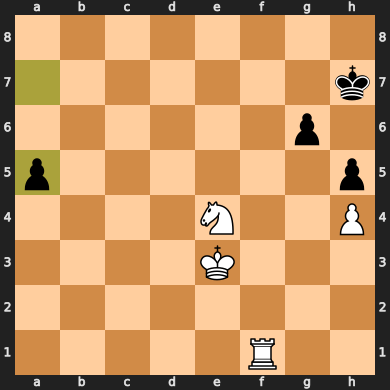

In [10]:
game.end().board()

# Review

Created a custom Class for cluster the moves and extend some properties

In [11]:
# Create List of pairs moves-node [ [w,b],[w,b],[w,b] ]
Moves = utilsChess.createNodeFlagList(game)

In [33]:
# create a list of visual elements to add in a board
movesVisuals = {}

#### Descripcion

Genera un objeto para cada movimiento:
- arrows: top moves
- text: scores in bold

In [13]:
def addToVisual( idx, prevTopList, movedColor, scoreBefore, scoreNow  ):
    '''
    Return a object with the visual elemnts parameters for the Html report
    '''
    arrows = [ [topMove[0], topMove[1], 'g'] for topMove in prevTopList ]
    movesVisuals[idx] = {
        'arrows': arrows,
        'text': f'<b>score:</b> {scoreBefore} to {scoreNow}<br/>'
    } 
    
def renderMoveData( inputValue, log=False ):
    '''
    Print the output for the selected move index
    @log: avoid print in cell, faster for recursion
    '''
    currentBoard = Moves[inputValue].board()
    if log:
        display(currentBoard)
        display(f'{Moves[inputValue]._idx}: {Moves[inputValue]._color} has moved {Moves[inputValue].uci()}')
    prevInputValue = inputValue - 1
    if( prevInputValue >= 0 ):
        prevBoard = Moves[prevInputValue].board()
        prevTopListMovements = utilsEngine.topList(prevBoard)
        scoreBefore = utilsEngine.score(prevBoard)
        scoreNow = utilsEngine.score(currentBoard)
        movedColor = Moves[inputValue]._color
        if log:
            display(f'>> best alternatives was: {prevTopListMovements}')
            display(f'>> best alternatives was: {utilsEngine.top(prevBoard)}')
            display(f'SCORE for {movedColor}: {scoreBefore} >>> {scoreNow} ')
            display(f'Move is {utilsEngine.typeMove(scoreBefore, scoreNow, Moves[inputValue]._turn )}')

        addToVisual(inputValue, prevTopListMovements, movedColor,scoreBefore,scoreNow  )

    if log:
        display(utilsEngine.showLine(currentBoard))

    nextInputValue = inputValue + 1
    if( nextInputValue <= len(Moves) ):
        if log:
            display(f'{Moves[nextInputValue]._color} next move is {Moves[nextInputValue].uci()}')
    if log:
        display(f'>> Next best moves: {utilsEngine.top(currentBoard)}')
    #dfOptions = utilsEngine.options(currentBoard)
    #display(dfOptions.head(8))

# a1) Move by Move review (Widget)

In [14]:
w = widgets.BoundedIntText(
    value=0,
    min=0,
    max=len(Moves),
    step=1,
    description='Movement:',
    disabled=False
)

def on_value_change(change):
    with out:
        inputValue = w.value
        clear_output() 
        renderMoveData(inputValue, True )   
 
w.observe(on_value_change, names='value')

display(w)
out = widgets.Output()
display(out)

on_value_change(0) 

BoundedIntText(value=0, description='Movement:', max=102)

Output()

# a2 ) Loop review from indexes

In [34]:
for index in registry['relevantMovesIndexs']:
    renderMoveData(index) 

# b) HTML Report

Creates and add the block to the html output

In [35]:
# BLOCK: Header
endBoard = Moves[-1].board()
tDescription = f'''
<b>W: </b>{game.headers["White"]}<br/>
<b>B: </b>{game.headers["Black"]}<br/>
<b>Result: </b>{game.headers["Result"]}, {game.headers["Termination"] }<br/>
<br/>
{game.mainline()}
'''
boardSvg1 = utilsBoard.boardToSvg( endBoard, flipped=True )
blockHeader = utilsBoard.getBlock12(boardSvg1, tDescription)

In [36]:
movesVisuals

{1: {'arrows': [['d7', 'd5', 'g'], ['e7', 'e5', 'g'], ['b8', 'c6', 'g']],
  'text': '<b>score:</b> -1.31 to -0.5<br/>'},
 3: {'arrows': [['h7', 'h5', 'g'], ['d7', 'd5', 'g'], ['b8', 'c6', 'g']],
  'text': '<b>score:</b> -0.7 to 0.42<br/>'},
 5: {'arrows': [['f6', 'h5', 'g'], ['f6', 'g8', 'g'], ['f6', 'g4', 'g']],
  'text': '<b>score:</b> 0.33 to 1.75<br/>'},
 6: {'arrows': [['h2', 'h3', 'g'], ['g1', 'h3', 'g'], ['d2', 'd4', 'g']],
  'text': '<b>score:</b> 1.62 to -2.77<br/>'},
 9: {'arrows': [['g5', 'h5', 'g'], ['g5', 'f6', 'g'], ['g5', 'e7', 'g']],
  'text': '<b>score:</b> -2.55 to 4.27<br/>'},
 13: {'arrows': [['f8', 'e7', 'g'], ['f8', 'c5', 'g'], ['f8', 'b4', 'g']],
  'text': '<b>score:</b> 2.37 to 4.29<br/>'},
 14: {'arrows': [['d5', 'f7', 'g'], ['d2', 'd4', 'g'], ['b2', 'b4', 'g']],
  'text': '<b>score:</b> 4.05 to 2.26<br/>'},
 15: {'arrows': [['f7', 'f6', 'g'], ['c5', 'e7', 'g'], ['f7', 'f5', 'g']],
  'text': '<b>score:</b> 1.64 to 3.51<br/>'},
 18: {'arrows': [['g5', 'f3', 'g']

In [37]:
visuals = {}
for index in registry['relevantMovesIndexs']:
    visuals[index] = movesVisuals[index]
visuals

{1: {'arrows': [['d7', 'd5', 'g'], ['e7', 'e5', 'g'], ['b8', 'c6', 'g']],
  'text': '<b>score:</b> -1.31 to -0.5<br/>'},
 3: {'arrows': [['h7', 'h5', 'g'], ['d7', 'd5', 'g'], ['b8', 'c6', 'g']],
  'text': '<b>score:</b> -0.7 to 0.42<br/>'},
 5: {'arrows': [['f6', 'h5', 'g'], ['f6', 'g8', 'g'], ['f6', 'g4', 'g']],
  'text': '<b>score:</b> 0.33 to 1.75<br/>'},
 6: {'arrows': [['h2', 'h3', 'g'], ['g1', 'h3', 'g'], ['d2', 'd4', 'g']],
  'text': '<b>score:</b> 1.62 to -2.77<br/>'},
 9: {'arrows': [['g5', 'h5', 'g'], ['g5', 'f6', 'g'], ['g5', 'e7', 'g']],
  'text': '<b>score:</b> -2.55 to 4.27<br/>'},
 13: {'arrows': [['f8', 'e7', 'g'], ['f8', 'c5', 'g'], ['f8', 'b4', 'g']],
  'text': '<b>score:</b> 2.37 to 4.29<br/>'},
 14: {'arrows': [['d5', 'f7', 'g'], ['d2', 'd4', 'g'], ['b2', 'b4', 'g']],
  'text': '<b>score:</b> 4.05 to 2.26<br/>'},
 15: {'arrows': [['f7', 'f6', 'g'], ['c5', 'e7', 'g'], ['f7', 'f5', 'g']],
  'text': '<b>score:</b> 1.64 to 3.51<br/>'},
 18: {'arrows': [['g5', 'f3', 'g']

In [43]:
# BLOCK: Moves
cells = []

for idx,move in enumerate(Moves):
    board = move.board()
    cellText = ''
    customArrows = []
    if idx in visuals:
        customArrows = visuals[idx]['arrows']
        cellText = visuals[idx]["text"]
    moveUciCells = utilsBoard.uciToList(move.uci())
    svgBoard = utilsBoard.boardToSvg(board, _arrows=customArrows ,_lastmove= moveUciCells, flipped=True  ) #_lastmove= moveUciCells
    text = f'''
        <b><i>{move._idx}: {move._color}</i></b><br/>
       {cellText}
    '''
    cellContent = utilsBoard.getCell(svgBoard, text)
    cells.append(cellContent)

cellsHtmlContent = ' '.join(cells)
blockMoves = utilsBoard.getBlock4x( cellsHtmlContent )


In [44]:
utilsBoard.resetRows()

utilsBoard.addRow(blockHeader)
utilsBoard.addRow(blockMoves)

utilsBoard.printHtml()

utilsBoard.save(f'../../report/{_notebookFolder}',f'{_version}.html')